In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data/real_estate_regression.csv')

df['date_created'] = pd.to_datetime(df['date_created'])
df['date_created_first'] = pd.to_datetime(df['date_created_first'])
df['pushed_up_at'] = pd.to_datetime(df['pushed_up_at'], errors='coerce', utc=True)


df['price_per_m2'] = df['price']/df['area_m2']


df.drop_duplicates(subset=['id'], inplace=True)

# we only have SELL type data
df.drop(columns=['transaction_type', 'id', 'date_created', 'date_created_first', 'pushed_up_at'], inplace=True)

df.rename(columns={'location.district': 'district', 'location.latitude': 'latitude',
       'location.longitude': 'longitude'}, inplace=True)

# remove outliers, where price=1, etc
cond1 = df['price_per_m2']>1000
cond2 = df['area_m2']>=10 # min legal area
cond3 = df['area_m2']<=2000 # we are interested in residential properties

df = df[cond1&cond2&cond3].reset_index(drop=True)

In [179]:
df['price_per_m2'].describe()

count     43046.000000
mean      18209.905784
std        5976.239293
min        1001.084207
25%       14611.486486
50%       17241.379310
75%       20815.100228
max      135792.405407
Name: price_per_m2, dtype: float64

<Axes: >

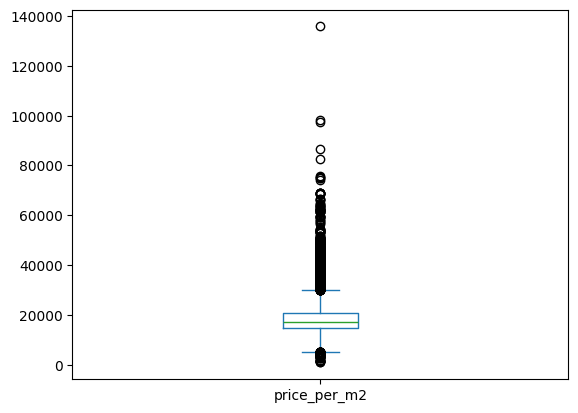

In [180]:
df['price_per_m2'].plot.box()

In [181]:
df.columns

Index(['estate', 'district', 'latitude', 'longitude', 'is_private_owner',
       'advertiser_type', 'area_m2', 'rooms_number', 'floor_number',
       'windows_type', 'heating', 'building_year', 'building_type',
       'building_floors_num', 'floors_num', 'construction_status',
       'building_material', 'building_ownership', 'has_lift', 'has_internet',
       'has_furniture', 'has_air_conditioning', 'has_tv', 'has_oven',
       'has_stove', 'has_dishwasher', 'has_fridge', 'has_washing_machine',
       'has_separate_kitchen', 'has_garage', 'has_usable_room', 'has_terrace',
       'has_balcony', 'has_attic', 'has_basement', 'has_garden', 'has_pool',
       'price', 'price_per_m2'],
      dtype='object')

In [182]:
df

,estate,district,latitude,longitude,is_private_owner,advertiser_type,area_m2,rooms_number,floor_number,windows_type,...,has_garage,has_usable_room,has_terrace,has_balcony,has_attic,has_basement,has_garden,has_pool,price,price_per_m2
0,FLAT,wola,52.231839,20.937315,True,PRIVATE,37.00,2,FIRST,PLASTIC,...,0,0,0,1,0,1,0,0,610000.0,16486.486486
1,FLAT,gorny-mokotow,52.181213,21.026067,True,PRIVATE,54.51,2,FOURTH,PLASTIC,...,0,0,0,1,0,0,0,0,1080000.0,19812.878371
2,FLAT,piaski,52.268537,20.949353,True,PRIVATE,47.00,3,SECOND,PLASTIC,...,0,0,0,1,0,1,0,0,780000.0,16595.744681
3,FLAT,mokotow,52.205586,21.032873,False,AGENCY,240.00,7,SECOND,NaN,...,0,0,1,1,0,0,0,0,4300000.0,17916.666667
4,HOUSE,ochota,52.209970,20.967270,False,AGENCY,290.00,6,NaN,PLASTIC,...,0,0,0,0,0,0,0,0,3300000.0,11379.310345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43041,FLAT,praga-poludnie,52.245768,21.104622,False,AGENCY,65.00,3,FIFTH,NaN,...,0,0,0,1,0,1,0,0,960000.0,14769.230769
43042,FLAT,mokotow,52.163980,20.992850,False,AGENCY,43.01,2,THIRD,NaN,...,0,1,0,1,0,0,0,0,980000.0,22785.398744
43043,FLAT,nowodwory,52.321090,20.938550,False,AGENCY,38.50,2,FIRST,NaN,...,0,0,1,0,0,0,0,0,569000.0,14779.220779
43044,FLAT,praga,52.228600,21.065010,False,AGENCY,57.00,3,THIRD,NaN,...,0,0,0,1,0,0,0,0,1019000.0,17877.192982


In [183]:
names_categorical = df.select_dtypes(np.object_).columns

list_name_variable = []
list_levels = []
nan_count = []

for i in range(0,len(names_categorical)):

    name_variable_x =  names_categorical[i] 
    
    levels_x = df[names_categorical [i]].unique()
    
    list_name_variable.append(name_variable_x)
    list_levels.append(levels_x)
    nan_count.append(df[names_categorical [i]].isna().sum())
    
print("String variables and their levels")
d = {'name_variable': list_name_variable, 
     'levels' : list_levels,
     'n_levels': [len(level) for level in list_levels],
     'nan_count': nan_count}

variable_def = pd.DataFrame(data=d)
variable_def

String variables and their levels


,name_variable,levels,n_levels,nan_count
0,estate,"[FLAT, HOUSE]",2,0
1,district,"[wola, gorny-mokotow, piaski, mokotow, ochota,...",178,651
2,advertiser_type,"[PRIVATE, AGENCY, nan, DEVELOPER]",4,1819
3,rooms_number,"[2, 3, 7, 6, 1, 4, 5, 8, 9, MORE, 10, nan]",12,1
4,floor_number,"[FIRST, FOURTH, SECOND, nan, GROUND, FIFTH, TH...",15,3936
5,windows_type,"[PLASTIC, nan, ALUMINIUM, WOODEN, NOTANY]",5,17718
6,heating,"[URBAN, nan, OTHER, GAS, BOILER_ROOM, ELECTRIC...",7,12122
7,building_type,"[BLOCK, APARTMENT, nan, TENEMENT, DETACHED, RI...",11,7486
8,floors_num,"[nan, ONE_FLOOR, TWO_FLOORS, MORE, GROUND_FLOOR]",5,40130
9,construction_status,"[READY_TO_USE, TO_COMPLETION, nan, TO_RENOVATI...",6,6954


In [184]:

categorical_columns = df.select_dtypes(include=['object']).columns

print("We have " + str(len(categorical_columns)) + " columns of type object to encode")
print("Names of the columns that needs to be encoded: "+ "\n" + str(categorical_columns))
df.select_dtypes(include=['object']).head()

We have 12 columns of type object to encode
Names of the columns that needs to be encoded: 
Index(['estate', 'district', 'advertiser_type', 'rooms_number', 'floor_number',
       'windows_type', 'heating', 'building_type', 'floors_num',
       'construction_status', 'building_material', 'building_ownership'],
      dtype='object')


,estate,district,advertiser_type,rooms_number,floor_number,windows_type,heating,building_type,floors_num,construction_status,building_material,building_ownership
0,FLAT,wola,PRIVATE,2,FIRST,PLASTIC,URBAN,BLOCK,NaN,READY_TO_USE,CONCRETE_PLATE,NaN
1,FLAT,gorny-mokotow,PRIVATE,2,FOURTH,PLASTIC,URBAN,BLOCK,NaN,READY_TO_USE,REINFORCED_CONCRETE,FULL_OWNERSHIP
2,FLAT,piaski,PRIVATE,3,SECOND,PLASTIC,URBAN,BLOCK,NaN,READY_TO_USE,OTHER,LIMITED_OWNERSHIP
3,FLAT,mokotow,AGENCY,7,SECOND,NaN,NaN,APARTMENT,NaN,READY_TO_USE,[],NaN
4,HOUSE,ochota,AGENCY,6,NaN,PLASTIC,URBAN,NaN,ONE_FLOOR,READY_TO_USE,BREEZEBLOCK,NaN


In [185]:
import unicodedata
import re

def clean_text(text):
    """
    Clean and normalize text to handle special characters and symbols
    """
    if pd.isna(text):
        return text
    
    text = str(text).lower()   
   
    # Remove special characters
    text = ''.join(char for char in unicodedata.normalize('NFKD', text)
                  if unicodedata.category(char)[0] != 'P' or char in 'äöüß')
      
    # Replace special characters with underscore
    text = re.sub(r'[^a-z0-9]+', '_', text)
    
    # Remove multiple underscores
    text = re.sub(r'_+', '_', text)
    text = text.strip('_')
    
    return text




for i in range(0,len(categorical_columns)):
    column = categorical_columns[i]
    df[column] = df[column].apply(clean_text)
    df = pd.concat([df,pd.get_dummies(df[column],prefix=column)],axis=1).drop([column],axis=1)



In [186]:
df

,latitude,longitude,is_private_owner,area_m2,building_year,building_floors_num,has_lift,has_internet,has_furniture,has_air_conditioning,...,building_material_concreteplate,building_material_hydroton,building_material_other,building_material_reinforcedconcrete,building_material_silikat,building_material_wood,building_ownership_fullownership,building_ownership_limitedownership,building_ownership_share,building_ownership_usufruct
0,52.231839,20.937315,True,37.00,1970.0,10.0,1,1,0,0,...,True,False,False,False,False,False,False,False,False,False
1,52.181213,21.026067,True,54.51,2009.0,16.0,1,1,1,1,...,False,False,False,True,False,False,True,False,False,False
2,52.268537,20.949353,True,47.00,1973.0,4.0,0,1,0,0,...,False,False,True,False,False,False,False,True,False,False
3,52.205586,21.032873,False,240.00,2021.0,9.0,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,52.209970,20.967270,False,290.00,2000.0,NaN,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43041,52.245768,21.104622,False,65.00,1997.0,5.0,1,1,1,0,...,False,False,False,False,False,False,False,False,False,False
43042,52.163980,20.992850,False,43.01,2016.0,7.0,1,1,1,0,...,False,False,False,False,False,False,True,False,False,False
43043,52.321090,20.938550,False,38.50,2000.0,5.0,1,1,1,0,...,False,False,False,False,False,False,True,False,False,False
43044,52.228600,21.065010,False,57.00,2024.0,4.0,1,1,0,1,...,False,False,False,False,False,False,True,False,False,False


# Modeling

## Split train test data

In [187]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import datasets 
from sklearn.model_selection import train_test_split

from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

import random

random.seed(45564556)


target_variable = "price"

feature_variables = df.columns.drop(target_variable)

df_train = df.sample(frac=0.8, random_state=1)
df_test = df.drop(df_train.index)

X_train = df_train[feature_variables]
X_test = df_test[feature_variables]
Y_train = df_train[target_variable]
Y_test = df_test[target_variable]



## Decision Tree Regressor

In [194]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': range(12, 25, 1),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [None, 10, 20, 30]
}

# neg_mean_absolute_percentage_error, neg_mean_squared_error
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)




/Users/sergiocarcamo/Dev/ml2/.venv/lib/python3.12/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Hyperparameters: {'max_depth': 16, 'max_leaf_nodes': None, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [195]:
model =  DecisionTreeRegressor(max_depth=16, min_samples_leaf=4, min_samples_split=2) 

model.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=16, min_samples_leaf=4)

In [203]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score, mean_absolute_percentage_error


def get_metrics(Y_test, Y_predict, which=None):
    mse = mean_squared_error(Y_test, Y_predict)
    rmse = root_mean_squared_error(Y_test, Y_predict)
    r2 = r2_score(Y_test, Y_predict)
    mape = mean_absolute_percentage_error(Y_test, Y_predict)

    if which:
        print(f'{which} metrics')
    print(f"MSE: {mse:.2f}, RMSE {rmse:.2f}, R2: {r2:.2f}, MAPE: {mape:.4f}")

In [202]:
Y_predict_train = model.predict(X_train)
Y_predict_test = model.predict(X_test)

get_metrics(Y_train, Y_predict_train, 'Train')
get_metrics(Y_test, Y_predict_test, 'Test')

Train metrics
MSE: 4934287759.35, RMSE 70244.49, R2: 1.00, MAPE: 0.0054
Test metrics
MSE: 4089319378.83, RMSE 63947.79, R2: 1.00, MAPE: 0.0114


/var/folders/3r/_0ptqbr15_970chzxcs_tb040000gn/T/ipykernel_50285/1833039355.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


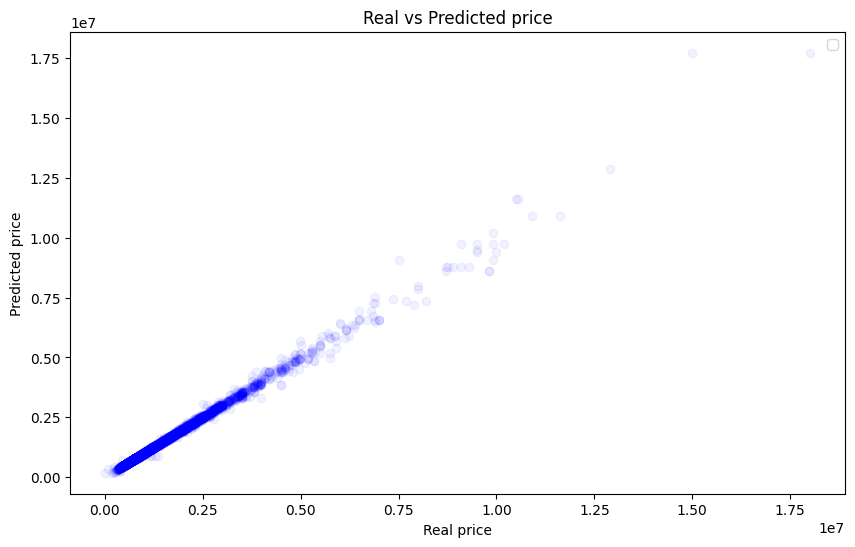

In [205]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))

plt.scatter(Y_test, Y_predict_test, color="blue", alpha=0.05)

plt.title('Real vs Predicted price')
plt.xlabel('Real price')
plt.ylabel('Predicted price')
plt.legend()

plt.show()

## XGBoost

In [208]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error


xbg_1 = xgb.XGBRegressor(
    tree_method="hist",
    eval_metric=mean_absolute_error,
)

# xbg_1.fit(X_train, Y_train)

xbg_1.fit(X_train, Y_train, eval_set=[(X_train, Y_train)])

[0]	validation_0-rmse:756310.89562	validation_0-mean_absolute_error:428468.56250
[1]	validation_0-rmse:549961.76825	validation_0-mean_absolute_error:306620.37500
[2]	validation_0-rmse:402828.91048	validation_0-mean_absolute_error:219881.00000
[3]	validation_0-rmse:297277.20609	validation_0-mean_absolute_error:158915.00000
[4]	validation_0-rmse:222254.38636	validation_0-mean_absolute_error:115082.17969
[5]	validation_0-rmse:169243.79012	validation_0-mean_absolute_error:85256.79688
[6]	validation_0-rmse:132304.13423	validation_0-mean_absolute_error:64989.68359
[7]	validation_0-rmse:106858.56994	validation_0-mean_absolute_error:51225.96484
[8]	validation_0-rmse:89242.82162	validation_0-mean_absolute_error:42897.04297
[9]	validation_0-rmse:77630.85252	validation_0-mean_absolute_error:37108.66406
[10]	validation_0-rmse:69704.06156	validation_0-mean_absolute_error:33537.22656
[11]	validation_0-rmse:64326.59186	validation_0-mean_absolute_error:31205.50977
[12]	validation_0-rmse:59098.75071	va

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False,
             eval_metric=<function mean_absolute_error at 0x12d5bcea0>,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [209]:
Y_predict_train = xbg_1.predict(X_train)
Y_predict_test = xbg_1.predict(X_test)

get_metrics(Y_train, Y_predict_train, 'Train')
get_metrics(Y_test, Y_predict_test, 'Test')

Train metrics
MSE: 621778336.80, RMSE 24935.48, R2: 1.00, MAPE: 0.0124
Test metrics
MSE: 4162896441.44, RMSE 64520.51, R2: 1.00, MAPE: 0.0146
